# Course Project-4
For this project, you will work on the Swissroads data set which contains several hundreds images of vehicles found in the EPFL - Lausanne area including cars, trucks, vans, bikes, motorcycles and others.

The goal of this project is to test the different classifiers and techniques from the course using high-level features extracted with a pretrained convolutional neural network from TensorFlow Hub and compare the results with your own ConvNet implementation trained from the raw image pixels.

## Feature extraction
In this first part of the project, start by extracting a set of high-level features for each image in the data set. To achieve this, you can use ex. the Inception v3 or MobileNet v2 ConvNets which respectively extract 2048 and 1280 high-level features.

This high-level features should then be used for all of the tasks in this project, except for when it is stated otherwise. In other words, the PCA exploration and all models (except for the Convolutional Neural Network) should use these high-level features. And in the case where we ask you to visualize the images, we of course mean to visualize the raw images with their pixel values.

Suggestion: consider storing the extracted high-level features, e.g. in npz files (one for train, validation and test), for quickly reloading them into each of the following notebooks.

Note: All your models should be trained on the training set, and the fine tuning of your hyperparameters should be validated on the validation set. The final test set should only be used for the final comparison to test the accuracies of your models on a new dataset. However, in the case where you use a cross-validation approach, you can of course merge the train and validation set into one bigger dataset and use this for model fitting.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import os
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

I will get the swissroads data in batches using three Image generators to create the training, validation and test set.
We use the rescale parameter to normalize the images between zero and one, and the horizontal_flip and rotation_range transformations to get slightly different variants of the images each time we sample from the images to fight overfitting and virtually augment the data set to improve training. This is why we only use those parameters for the train_generator and valid_generator and not the test_generator one. the validation data will also go through the training transformations.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# validation split not needed here, validation set is given in a separate folder
# train_generator = ImageDataGenerator(rescale = 1/255, horizontal_flip = True, rotation_range = 5)
# valid_generator = ImageDataGenerator(rescale = 1/255, horizontal_flip = True, rotation_range = 5)
# test_generator = ImageDataGenerator(rescale = 1/255)

# or we do not need to do image augmantation to change the dataset here
train_generator = ImageDataGenerator(rescale = 1/255)
valid_generator = ImageDataGenerator(rescale = 1/255)
test_generator = ImageDataGenerator(rescale = 1/255)

I create an iterator that iterates over the directory of .png images using the image generator instances (objects) previously created

I resize the images to 299x299 because this is the size used for the Inception V3 model that I will use.

batches not necessary here, shuffling also not needed, for feature extraction not needed, only for training

In [23]:
trainset = train_generator.flow_from_directory(
    os.path.join('swissroads','train'), batch_size = 32, target_size = (299,299), shuffle = False, class_mode = 'sparse')

validset = valid_generator.flow_from_directory(
    os.path.join('swissroads', 'valid'), batch_size = 32, target_size = (299, 299), shuffle = False, class_mode = 'sparse')

testset = test_generator.flow_from_directory(
    os.path.join('swissroads', 'test'), batch_size = 32, target_size = (299,299), shuffle = False, class_mode = 'sparse')

Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


We create a trainset and a validset iterator for the images from the traindirectory and a testset one for the images from the test directory. Note that we don't need to shuffle the validation and test data (i.e we set shuffle=False) since shuffling only affects training.

In [24]:
len(trainset)

9

In [25]:
len(validset)

5

In [26]:
len(testset)

2

In [27]:
trainset.filenames[:]

['bike/bike-0001.png',
 'bike/bike-0002.png',
 'bike/bike-0003.png',
 'bike/bike-0004.png',
 'bike/bike-0005.png',
 'bike/bike-0006.png',
 'bike/bike-0007.png',
 'bike/bike-0008.png',
 'bike/bike-0009.png',
 'bike/bike-0010.png',
 'bike/bike-0011.png',
 'bike/bike-0012.png',
 'bike/bike-0013.png',
 'bike/bike-0014.png',
 'bike/bike-0015.png',
 'bike/bike-0016.png',
 'bike/bike-0017.png',
 'bike/bike-0018.png',
 'bike/bike-0019.png',
 'bike/bike-0020.png',
 'bike/bike-0021.png',
 'bike/bike-0022.png',
 'bike/bike-0023.png',
 'bike/bike-0024.png',
 'bike/bike-0025.png',
 'bike/bike-0026.png',
 'bike/bike-0027.png',
 'bike/bike-0028.png',
 'bike/bike-0029.png',
 'bike/bike-0030.png',
 'bike/bike-0031.png',
 'bike/bike-0032.png',
 'bike/bike-0033.png',
 'bike/bike-0034.png',
 'bike/bike-0035.png',
 'bike/bike-0036.png',
 'bike/bike-0037.png',
 'bike/bike-0038.png',
 'bike/bike-0039.png',
 'bike/bike-0040.png',
 'bike/bike-0041.png',
 'bike/bike-0042.png',
 'bike/bike-0043.png',
 'bike/bike

In [28]:
validset.filenames[:]

['bike/bike-0067.png',
 'bike/bike-0068.png',
 'bike/bike-0069.png',
 'bike/bike-0070.png',
 'bike/bike-0071.png',
 'bike/bike-0072.png',
 'bike/bike-0073.png',
 'bike/bike-0074.png',
 'bike/bike-0075.png',
 'bike/bike-0076.png',
 'bike/bike-0077.png',
 'bike/bike-0078.png',
 'bike/bike-0079.png',
 'bike/bike-0080.png',
 'bike/bike-0081.png',
 'bike/bike-0082.png',
 'bike/bike-0083.png',
 'bike/bike-0084.png',
 'bike/bike-0085.png',
 'bike/bike-0086.png',
 'bike/bike-0087.png',
 'bike/bike-0088.png',
 'bike/bike-0089.png',
 'bike/bike-0090.png',
 'bike/bike-0091.png',
 'bike/bike-0092.png',
 'bike/bike-0093.png',
 'bike/bike-0094.png',
 'bike/bike-0095.png',
 'bike/bike-0096.png',
 'bike/bike-0097.png',
 'bike/bike-0098.png',
 'bike/bike-0099.png',
 'car/car-0065.png',
 'car/car-0066.png',
 'car/car-0067.png',
 'car/car-0068.png',
 'car/car-0069.png',
 'car/car-0070.png',
 'car/car-0071.png',
 'car/car-0072.png',
 'car/car-0073.png',
 'car/car-0074.png',
 'car/car-0075.png',
 'car/car-

In [29]:
testset.filenames[:]

['bike/bike-0100.png',
 'bike/bike-0101.png',
 'bike/bike-0102.png',
 'bike/bike-0103.png',
 'bike/bike-0104.png',
 'bike/bike-0105.png',
 'bike/bike-0106.png',
 'bike/bike-0107.png',
 'bike/bike-0108.png',
 'bike/bike-0109.png',
 'bike/bike-0110.png',
 'bike/bike-0111.png',
 'car/car-0097.png',
 'car/car-0098.png',
 'car/car-0099.png',
 'car/car-0100.png',
 'car/car-0101.png',
 'car/car-0102.png',
 'car/car-0103.png',
 'car/car-0104.png',
 'car/car-0105.png',
 'car/car-0106.png',
 'car/car-0107.png',
 'motorcycle/motorcycle-0077.png',
 'motorcycle/motorcycle-0078.png',
 'motorcycle/motorcycle-0079.png',
 'motorcycle/motorcycle-0080.png',
 'motorcycle/motorcycle-0081.png',
 'motorcycle/motorcycle-0082.png',
 'motorcycle/motorcycle-0083.png',
 'motorcycle/motorcycle-0084.png',
 'motorcycle/motorcycle-0085.png',
 'other/other-0049.png',
 'other/other-0050.png',
 'other/other-0051.png',
 'other/other-0052.png',
 'other/other-0053.png',
 'other/other-0054.png',
 'truck/truck-0064.png',
 't

In [30]:
trainset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

In [31]:
class_names = trainset.class_indices

In [32]:
len(trainset.class_indices)

6

In [33]:
len(trainset)

9

In [34]:
trainset.samples

280

In [35]:
# Inception v3 
# module = hub.Module("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1")
# height, width = hub.get_expected_image_size(module)
# images = ...  # A batch of images with shape [batch_size, height, width, 3].
# features = module(images)  # Features with shape [batch_size, num_features].

# The output for each image in the batch is a feature vector of size num_features = 2048.

# For this module, the size of the input image is fixed to height x width = 299 x 299 pixels. 
# The input images are expected to have color values in the range [0,1], 
# following the common image input conventions.

In [36]:
len(trainset)

9

In [37]:
range(len(trainset))

range(0, 9)

I will extact the high-level features from the Inception V3 images and use them as the inputs to the machine learning algorithms

In [38]:
img_graph = tf.Graph()
with img_graph.as_default():
    # download the Mobile V2 model
    module_url = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1'
    feature_extractor = hub.Module(module_url)
    
    # create input placeholder
    input_imgs = tf.placeholder(dtype = tf.float32, shape = [None, 299, 299, 3])
    input_labels = tf.placeholder(dtype = tf.float32, shape = [None, len(trainset.class_indices)])
    
    # A node with the features: create a node and pass the placeholder to the node 
    imgs_features = feature_extractor(input_imgs)
    # but the labels???????????? there ar eno labels
    
    # collect initializers
    init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
    
img_graph.finalize()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# Disccussion on these results

In [39]:
# Create a session
sess = tf.Session(graph = img_graph)

# Initialize it
sess.run(init_op)

X_tr = []
y_tr = []
features_tr = []

X_val = []
y_val = []

X_test = []
y_test = []

# Extract features and labels in batches (for loop) to constract the X matrix
# feat_val, label_val = sess.run([feats, label])

for i in range(len(trainset)):
    img_batch, label_batch = trainset.next()
    #features_in_batch, label_in_batch = sess.run(imgs_features, feed_dict = { input_imgs: img_batch} )
        # in case of sdhuffling label are needed 
    features_in_batch = sess.run(imgs_features, feed_dict = { input_imgs: img_batch })
    X_tr.extend(features_in_batch)
    y_tr.extend(label_batch)
print('------ Training ------------')
print('Batch size:', img_batch.shape) # (batch_size, 299, 299, 3)
print('Label size:', label_batch.shape)
print('Data type:', img_batch.dtype) 
print('Label type:', label_batch.dtype) 
    # features = sess.run(imgs_features, feed_dict = { input_imgs: img_batch} )
# print('X', X.shape)


# I do the feature extraction only for the training data.
for i in range(len(validset)):
    img_batch, label_batch = validset.next()
    features_in_batch = sess.run(imgs_features, feed_dict = { input_imgs: img_batch })
    X_val.extend(features_in_batch)
    y_val.extend(label_batch)
print('------ Validation ------------')
print('Batch size:', img_batch.shape) # (batch_size, 299, 299, 3)
print('Label size:', label_batch.shape)
print('Data type:', img_batch.dtype) 
print('Label type:', label_batch.dtype) 


for i in range(len(testset)):
    img_batch, label_batch = testset.next()   
    features_in_batch = sess.run(imgs_features, feed_dict = { input_imgs: img_batch })
    X_test.extend(features_in_batch)
    y_test.extend(label_batch)
print('------ Test ------------')
print('Batch size:', img_batch.shape) # (batch_size, 299, 299, 3)
print('Label size:', label_batch.shape)
print('Data type:', img_batch.dtype) 
print('Label type:', label_batch.dtype) 


features_tr = np.array(X_tr)
labels_tr = np.array(y_tr)
features_valid = np.array(X_val)
labels_valid = np.array(y_val)
features_test = np.array(X_test)
labels_test = np.array(y_test)
# all at once, without batches
# features_train = sess.run(imgs_features, feed_dict={input_imgs: train_set})
# load the pictures into an array X of shape (280, 224, 224, 3) (for the train data) 

# features.shape


------ Training ------------
Batch size: (24, 299, 299, 3)
Label size: (24,)
Data type: float32
Label type: float32
------ Validation ------------
Batch size: (11, 299, 299, 3)
Label size: (11,)
Data type: float32
Label type: float32
------ Test ------------
Batch size: (18, 299, 299, 3)
Label size: (18,)
Data type: float32
Label type: float32


I will now save the high level features.

In [40]:
features_tr.shape

(280, 2048)

In [41]:
labels_tr.shape

(280,)

In [42]:
features_valid.shape

(139, 2048)

In [43]:
labels_valid.shape

(139,)

In [44]:
len(validset)

5

In [45]:
features_test.shape

(50, 2048)

In [46]:
labels_test.shape

(50,)

In [47]:
features_valid.shape

(139, 2048)

In [48]:
len(features_tr)

280

In [49]:
np.shape(features_tr)

(280, 2048)

In [50]:
features_tr.dtype

dtype('float32')

In [51]:
type(features_tr)

numpy.ndarray

In [52]:
len(features_tr)

280

In [53]:
labels_tr.shape

(280,)

In [54]:
features_valid.shape

(139, 2048)

In [55]:
labels_valid.shape

(139,)

In [56]:
features_test.shape

(50, 2048)

In [57]:
labels_test.shape

(50,)

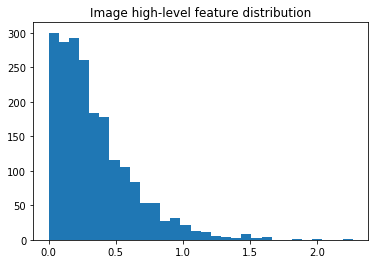

In [58]:
plt.hist(features_tr[3], bins = 30)
plt.title('Image high-level feature distribution')
plt.show()

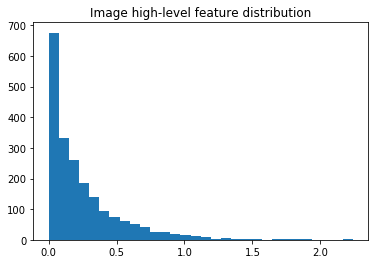

In [59]:
plt.hist(features_tr[2], bins = 30)
plt.title('Image high-level feature distribution')
plt.show()

I will now store the extracted high-level features in .npz file to quickly load them for other notebooks.

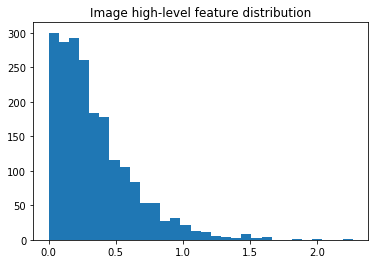

In [60]:
plt.hist(features_tr[3], bins = 30)
plt.title('Image high-level feature distribution')
plt.show()

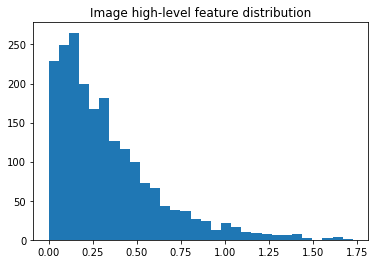

In [61]:
plt.hist(features_tr[200], bins = 30)
plt.title('Image high-level feature distribution')
plt.show()

On the above histograms I have ploted the distribution of high-level features for three images. it is clear that some high-level features appear more aften than others 

In [62]:
np.save('features_tr', features_tr )

In [63]:
np.savez('features_tr', features_tr)

In [64]:
np.save('labels_tr', labels_tr)

In [65]:
np.savez('labels_tr', labels_tr)

In [66]:
np.save('features_valid', features_valid )

In [67]:
np.savez('features_valid', features_valid)

In [68]:
np.save('labels_valid', labels_valid)

In [69]:
np.savez('labels_valid', labels_valid)

In [70]:
np.save('features_test', features_test )

In [71]:
np.savez('features_test', features_test)

In [72]:
np.save('labels_test', labels_test)

In [73]:
np.savez('labels_test', labels_test)